In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# advect - Program to solve the advection equation 
# using the various hyperbolic PDE schemes
# clear all  help advect  # Clear memory and print header
plt.close('all')
#* Select numerical parameters (time step, grid spacing, etc.).
method = 1
#N = int(input('Enter number of grid points: '))
N = 100

tmax = 10.0

N = 100
L = 1.     # System size
h = L/N    # Grid spacing
c = 10.      # Wave speed in PDE
veloc = 1.0 # initial veloc

# x vals range and interior xpoints range
krange_all = range(-1,N+1)
krange = range(0,N)


print('Time for wave to move one grid spacing is ',h/c)
#tau = float(input('Enter time step: '))
tau = .1*h/c # time step guess


coeff = (c*tau/h)**2    # Coefficient used by L-W scheme

# PRINT PARAMETERS
tprint = 0.0
dtprint = 0.2
Nplots = 0
tmax = 3.0

print('Wave circles system in %6.2f steps'%(L/(c*tau)))
#nStep = int(input('Enter number of steps: '))
nStep = int(2*L/(c*tau)) # NOT USING THIS ANY MORE
# DEBUG
nStep = tmax/tau




Time for wave to move one grid spacing is  0.001
Wave circles system in 1000.00 steps


In [2]:
x = (np.arange(-1,N+1)+1./2.)*h - L/2  # Coordinates of grid points

#* Set initial and boundary conditions.
sigma = 0.1              # Width of the Gaussian pulse
k_wave = np.pi/sigma        # Wave number of the cosine

#

# Initial Condition Gaussian-cosine pulse
x0 = 0.0 # center of IC
a =  np.cos(k_wave*(x-x0)) * np.exp(-(x-x0)**2/(2*sigma**2))
a =  np.exp(-(x-x0)**2/(2*sigma**2))

# Initial Condition = zero + piecewise linear symmetric around x0
a = 0.0* x
x0 = 0.2 # center of IC
width = 0.1
height = 0.1
slope = height/width
for k in krange:
    xval = x[k]
    if xval >= x0-width and xval <= x0:
        a[k] = slope*(xval - x0 + width)
    elif xval >= x0 and xval <= x0+width:
        a[k] = (width)*slope - slope*(xval - x0)
# smooth it a bit
b = a
for k in krange:
    b[k] = (a[k-1] + a[k] + a[k+1])/3.0
    
a = b
    



# Initial Condition = sine 
#x0 = 0.0 # center of IC
#k_wave = np.pi*2.0   
#a =  np.sin(k_wave*(x-x0)) 

min(krange) =  0
max(krange) =  99
min(krange_all) =  -1
max(krange_all) =  100
len(x) =  102
tau= 0.0001
coeff= 0.010000000000000002
x vector
[-0.505 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415
 -0.405 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315
 -0.305 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215
 -0.205 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115
 -0.105 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015
 -0.005  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085
  0.095  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185
  0.195  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285
  0.295  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385
  0.395  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485
  0.495  0.505]
a vector
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


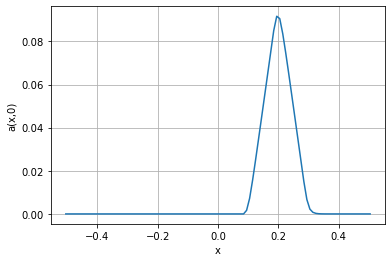

In [3]:
# Use Dirichlet BCs
a[0] = 0
a[N+1] = 0

# DEBUG STUFF
#DEBUG

print('min(krange) = ', min( krange))
print('max(krange) = ', max( krange))
print('min(krange_all) = ', min( krange_all))
print('max(krange_all) = ', max( krange_all))



print("len(x) = ", len(x))
print('tau=',tau)
print('coeff=',coeff)

print("x vector")
print(x)

print("a vector")
print(a)

plt.figure()
plt.plot(x,a)
plt.xlabel('x')
plt.ylabel('a(x,0)')
plt.grid(True)

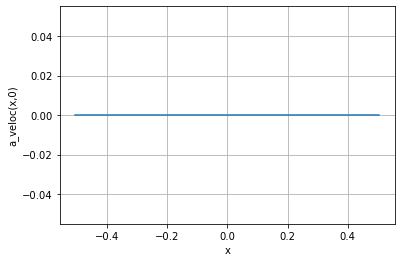

In [4]:
# initial velocity

aveloc = a
for k in krange_all:
    aveloc[k] = veloc*tau
    
a_old = a - aveloc # using formula  (a - a_old)/tau = veloc* (1,1, ..., 1)
a_new = a

maxstep = int(nStep+1)
plt.figure()
plt.plot(x,a_old)
plt.xlabel('x')
plt.ylabel('a_veloc(x,0)')
plt.grid(True)

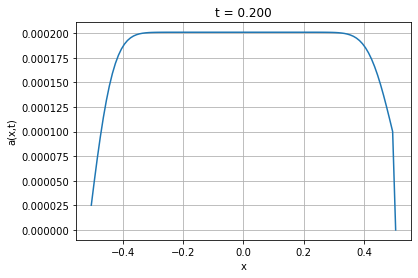

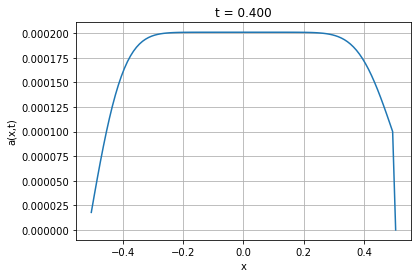

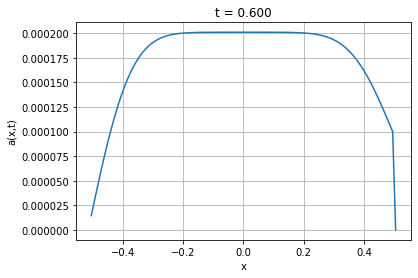

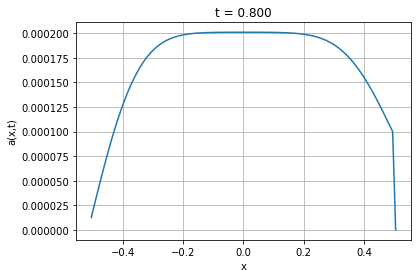

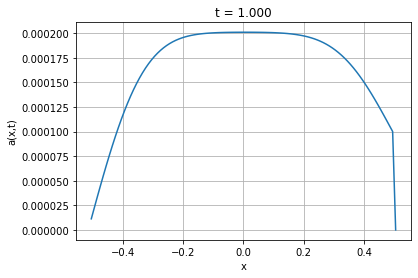

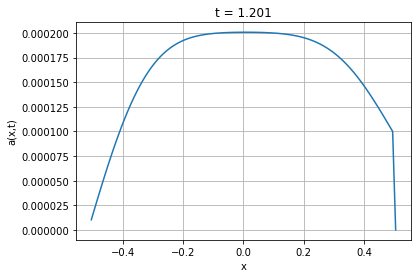

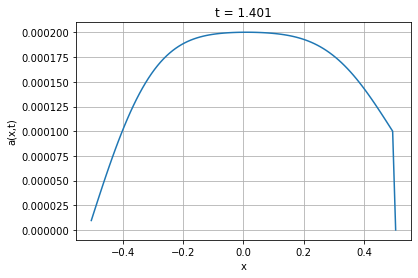

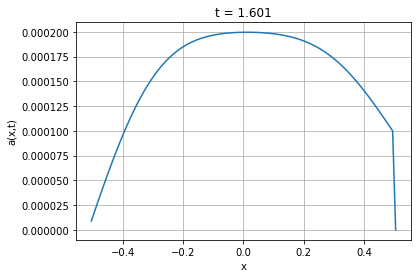

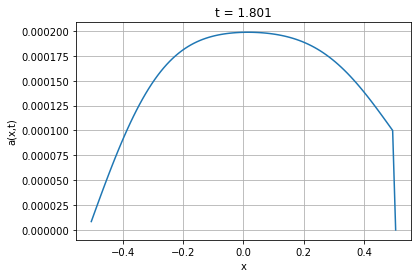

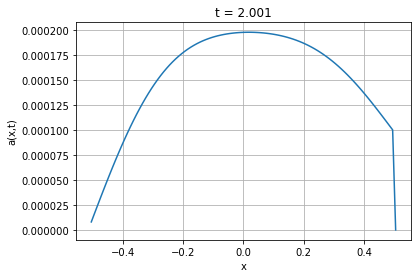

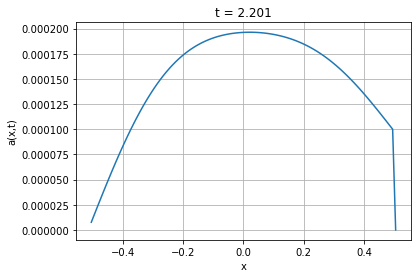

In [5]:
#* Loop over desired number of steps.
tprint = 0.0
t = 0.0
Nplots = 0
for iStep in range(1,maxstep):  ## MAIN LOOP ##    
    t = t + tau
    tprint = tprint + tau
    
    #* Compute new values of wave equation, 
    if( method == 1 ):  
        for k in krange:
            a_new[k] = 2*a[k] - a_old[k] + coeff*(a[k-1]-2*a[k]+a[k+1]) 
        a_new[-1] = 0.0  
        a_new[N+1] = 0.0
        
        for k in krange_all:
            a_old[k] = a[k]
            a[k] = a_new[k]
  
  #* Periodically record a(t) for plotting.
 #   if( (iStep%plotStep) < 1 and iStep >0):  # Every plotStep steps record
 #       iplot = iplot+1
 #       aplot = np.vstack((aplot,a))       # Record a(i) for ploting
 #       tplot = np.append(tplot,tau*iStep)
 #       #print('%d out of %d steps completed'%(iStep,nStep))
    if( tprint > dtprint):
        tprint = 0.0
        
        plt.figure()
        plt.plot(x,a)
        plt.xlabel('x')
        plt.ylabel('a(x,t)')
        plt.title('t = %1.3f'% t)
        plt.grid(True)
        plt.draw()
        Nplots = Nplots + 1
        #plt.pause(.001)
    if( t > tmax or Nplots > 10):
        break
        
        
        
      

In [6]:
#* Plot the initial and final states.
plt.figure(1)   # Clear figure 1 window and bring forward
plt.plot(x,aplot[0,:],'-',x,a,'--')
plt.legend(['Initial  ','Final'])
plt.xlabel('x')
plt.ylabel('a(x,t)')
plt.grid(True)
# pause(1)    # Pause 1 second between plots

# #* Plot the wave amplitude versus position and time
tt,xx = np.meshgrid(x,tplot)
fig = plt.figure(2)   # Clear figure 2 window and bring forward
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, tt, aplot, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_zlabel('Amplitude)')

# mesh(tplot,x,aplot)
# view([-70 50])  # Better view from this angle

plt.show()

# animation
ani = 0
if ani == 1:
    for angle in range(0, 360,4):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(.001)

NameError: name 'aplot' is not defined

<Figure size 432x288 with 0 Axes>